In [1]:
import numpy as np
from rgb import plot_data, get_layers
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
stack = np.load("../stl_files/handgun_knife_mouse.npy")
stack.shape

(390, 1002, 1002)

In [3]:
first, second = get_layers(stack)
gun, knife, mouse = stack[..., :first], stack[..., first:second], stack[..., second:]
gun.shape, knife.shape, mouse.shape

((390, 1002, 93), (390, 1002, 128), (390, 1002, 781))

In [4]:
# plot_data(gun.sum(axis = 2)), plot_data(knife.sum(axis = 2)), plot_data(mouse.sum(axis =2))

In [5]:
gun_plate = gun.sum(axis=2)
gun_plate.shape

(390, 1002)

In [6]:
# def layer_color(layer, density=0.65):
#     layer_im = np.zeros(layer.shape + (3,))
#     layer_im[..., 0][layer > 0.] = density
#     # gun_im[..., 1][gun_plate > 0.] = 1
#     layer_im[..., 1] = layer / layer.max()
#     layer_im[..., 2] = 1.

#     return colors.hsv_to_rgb(layer_im)

In [7]:
# def layer_color(layer, object_type = None):
#     assert object_type is not None
#     if object_type not in mapping.keys() or not mapping[object_type]:
#         raise NotImplementedError(f"Available objects are {list(mapping.keys())}")
#     layer_im = np.zeros(layer.shape + (3,))
    
#     layer_im[..., 0] = np.interp(layer, np.linspace(layer.min(), layer.max(), 100), np.linspace(*mapping[object_type], 100))
#     layer_im[..., 1] = 1.
#     layer_im[..., 1][layer == 0.] = 0.02
#     layer_im[..., 2] = 1.
#     layer_im[..., 2][layer != 0.] = 1.

#     return colors.hsv_to_rgb(layer_im)

In [8]:
# def layer_color(layer, object_type = None):
#     assert object_type is not None
#     if object_type not in mapping.keys() or not mapping[object_type]:
#         raise NotImplementedError(f"Available objects are {list(mapping.keys())}")
#     layer_im = np.zeros(layer.shape + (3,))
    
#     layer_im[..., 0] = np.interp(layer, np.linspace(layer.min(), layer.max(), 100), np.linspace(*mapping[object_type], 100))
#     layer_im[..., 1] = 1.
#     layer_im[..., 2] = .9
    
#     layer_im[..., 1][layer == 0.] = 0. # Make background white
#     layer_im[..., 2][layer == 0.] = 1.

#     return colors.hsv_to_rgb(layer_im)

In [9]:
def layer_color(layer, object_type = None):
    assert object_type is not None
    if object_type not in mapping.keys() or not mapping[object_type]:
        raise NotImplementedError(f"Available objects are {list(mapping.keys())}")
    layer_im = np.zeros(layer.shape + (3,))
    
    hue_map = np.interp(layer, np.linspace(layer.min(), layer.max(), 100), np.linspace(*mapping[object_type], 100))
    layer_im[..., 0] = hue_map
    layer_im[..., 1] = 1.
    layer_im[..., 2] = 1. - np.interp(layer, np.linspace(layer.min(), layer.max(), 100), np.linspace(0.1, 0.5, 100))  # more depth -> more dark
    
    layer_im[..., 1][layer == 0.] = 0. # Make background white
    layer_im[..., 2][layer == 0.] = 1.

    return colors.hsv_to_rgb(layer_im)

In [10]:
# mapping = {
#     'gun': [0.3, 0.7],
#     'knife': [0.25, 0.4],
#     'plastic': [0.09, 0.12],
#     'cloth': [0.1, 0.11],
# }

In [11]:
mapping = {
    'gun': [0.3, 0.7],
    'knife': [0.25, 0.5],
    'plastic': [0.09, 0.12],
    'cloth': [0.1, 0.11],
}

In [12]:
from PIL import Image as Im

In [37]:
knife_img = Im.fromarray((layer_color(knife.sum(axis=2), 'knife')*255.).astype(np.uint8)); knife_rgba = knife_img.copy()
gun_img = Im.fromarray((layer_color(gun.sum(axis=2), 'gun')*255.).astype(np.uint8)); gun_rgba = gun_img.copy()
mouse_img = Im.fromarray((layer_color(mouse.sum(axis=2), 'plastic')*255.).astype(np.uint8)); mouse_rgba = mouse_img.copy()

In [38]:
gun_rgba.putalpha(175), knife_rgba.putalpha(175), mouse_rgba.putalpha(175)

(None, None, None)

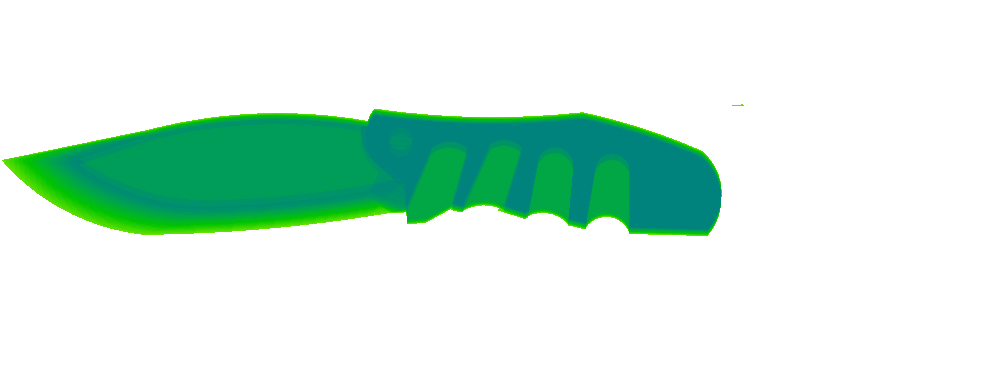

In [40]:
knife_img

In [15]:
def transparent_bg(rgba):
    new_data = []
    for i in rgba.getdata():
        if i[0] == 255 and i[1] == 255 and i[2] == 255:
            new_data.append((255, 255, 255, 0))
        else:
            new_data.append(i)
    rgba.putdata(new_data)
    
    return rgba

In [18]:
plot_data(np.array(gun_img) * np.array(gun_rgba))

ValueError: operands could not be broadcast together with shapes (390,1002,3) (390,1002,4) 

In [387]:
def merge_layers(layers):
    r = np.add(*[layers[i][..., 0] for i in range(len(layers))])
    g = np.add(*[layers[i][..., 1] for i in range(len(layers))])
    b = np.add(*[layers[i][..., 2] for i in range(len(layers))])
    
    return np.stack((r, g, b), axis = 2)

In [393]:
def merge_layers(layers):
    image = np.zeros_like(layers[0])
    
    for l in layers:
        image[..., 0][l[..., 0] != 0.] = l[..., 0]
        image[..., 1][l[..., 1] != 0.] = l[..., 1]
        image[..., 2][l[..., 2] != 0.] = l[..., 2]
    
    return image

In [394]:
merged_image = merge_layers([layer_color(gun.sum(axis=2), 'gun'), layer_color(knife.sum(axis=2), 'knife'), layer_color(mouse.sum(axis=2), 'plastic')])

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [358]:
from PIL import Image

In [359]:
def rmBlack(img): #Changes the black pixels to transparent
    img = img.convert('RGBA')
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    return img

In [365]:
im = layer_color(knife.sum(axis=2), 'knife') * 255.
im = Image.fromarray(im.astype(np.uint8))

In [371]:
im.putalpha(128)
im.save('alpha.png')